In [4]:
import pandas as pd

# read the US pumpkins csv file
pumpkins = pd.read_csv("C:/Users/HP/Downloads/US-pumpkins.csv")

# filter out any rows that don't use price per bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [5]:
# count how many cells in each column are empty
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [6]:
# Define the columns we want to keep
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date'] 
# Drop all other columns
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [7]:
# calculate the average price from the high and low price columns
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
# get the month from the date column
month = pd.DatetimeIndex(pumpkins['Date']).month
# create a new data frame with these columns
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})

In [8]:
# convert the price of all cells prices by 1 1/9 bushels by dividing by 1 1/9
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/( 1 + 1/9)
# convert the price of all cells prices by 1/2 bushels by dividing by 1/2
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/( 1/2)


In [9]:
# print the first few rows from the data frame
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


In [10]:
import matplotlib.pyplot as plt

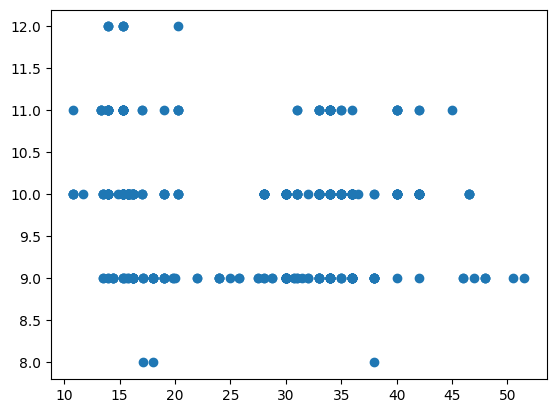

In [11]:
# get the values we want to plot
price = new_pumpkins.Price
month = new_pumpkins.Month

# create a show scatter plot of price vs month
plt.scatter(price, month)
plt.show()

Text(0.5, 0, 'month')

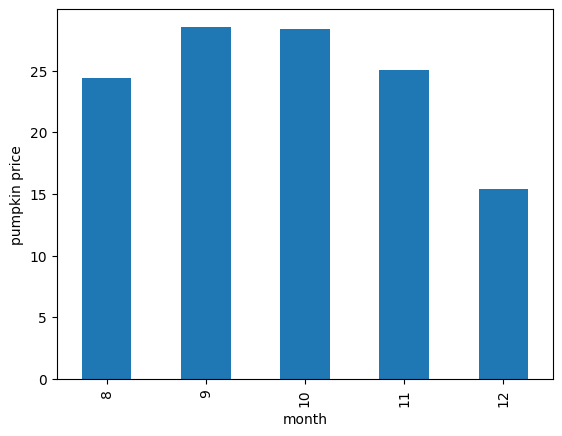

In [16]:
# group the pumpkins into a bar chart by month and price
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('pumpkin price')
plt.xlabel('month')